## Import libraries and code

In [1]:
# from database import csv_dataframe_creating as cs
import load_data as ld
import dataloaders as dl
import visualization as vis

import pandas as pd
import numpy as np
import os
# from rdkit import Chem, DataStructs
# from rdkit.Chem import AllChem, rdMolDescriptors
# from rdkit.Chem import rdMolTransforms as rdmt
# from rdkit.Chem import rdShapeHelpers as rdshp
# import molvs as mv
# from rdkit.Geometry import rdGeometry 
from matplotlib.pyplot import spy
import matplotlib.pyplot as plt
from scipy import signal

import torch
from torch.utils import data as td

import time

import sqlite3

#number of conformers created for every molecule
global NUM_CONFS
NUM_CONFS=100

#amount of chemical elements taking into account
global AMOUNT_OF_ELEM
AMOUNT_OF_ELEM=6

## Creating dataframe with molecules and properties
example of code, needed datset already in `tox21_10k_data_all_no_salts.csv`

In [2]:
# #load dataset to dataframe
# data=cs.create_dataset()

# #delete repeating molecules values
# data=cs.del_duplicates(data)

# #delete molecules, that are not in sql database due to errors in rdkit
# data=cs.del_wrong_smiles(data)

In [3]:
DATASET_PATH = '/gpfs/gpfs0/a.alenicheva/Tox21/elements_9'

## Loading data into dictionary

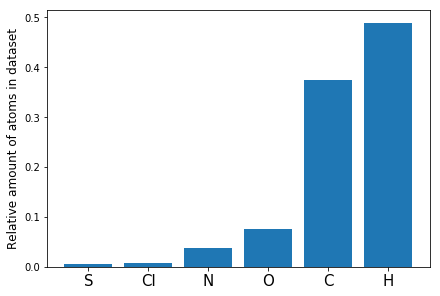

In [3]:
#get dataset without duplicates from csv
data=pd.read_csv('tox21_10k_data_all_no_salts.csv')

#create elements dictionary
elements=ld.create_element_dict(data,amount=AMOUNT_OF_ELEM)

#read databases to dictionary
conf_calc=ld.reading_sql_database()

#create indexing and label_dict for iteration
indexing,label_dict=ld.indexing_label_dict(data,conf_calc)

In [4]:
len(list(conf_calc.keys()))

7347

In [2]:
#get dataset without duplicates from csv
data = pd.read_csv(os.path.join('../Tox21_Neural_Net/database', 'tox21_10k_data_all_no_salts.csv'))

#create elements dictionary
# elements=ld.create_element_dict(data,amount=AMOUNT_OF_ELEM)
elements={"C":0,"Cl":1,"H":2,"N":3,"O":4,"S":5}
elements = {'I': 0,
 'P': 1,
 'Br': 2,
 'F': 3,
 'S': 4,
 'Cl': 5,
 'N': 6,
 'O': 7,
 'C': 8}
#read databases to dictionary
conf_calc=ld.reading_sql_database(os.path.join(DATASET_PATH, 'tox21_10k_data_all_no_salts.db'))

#create indexing and label_dict for iteration
indexing,label_dict=ld.indexing_label_dict(data,conf_calc)

NameError: name 'DATASET_PATH' is not defined

In [ ]:
len(list(conf_calc.keys()))

## Dataloaders pytorch

In [12]:
# make dataloader for Gauss transformation
training_set_gauss = dl.Gauss_dataset(conf_calc,label_dict,elements,indexing,np.arange(0, len(conf_calc.keys())),sigma=3,dim=50)
training_generator_gauss = td.DataLoader(training_set_gauss)

# make dataloader for Waves transformation
training_set_waves = dl.Waves_dataset(conf_calc,label_dict,elements,indexing,np.arange(0, len(conf_calc.keys())),sigma=6,dim=50)
training_generator_waves = td.DataLoader(training_set_waves)

tensor(0.) tensor(7.4699)


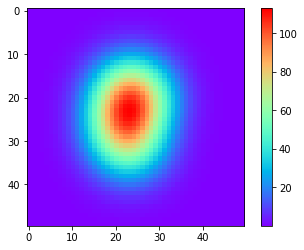

tensor(0.) tensor(11.8109)


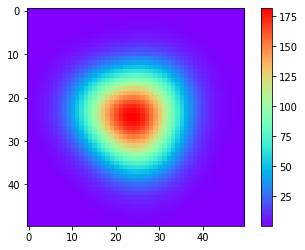

tensor(0.) tensor(11.5637)


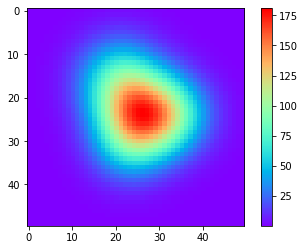

tensor(0.) tensor(4.8663)


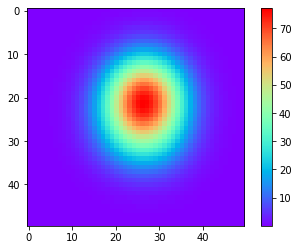

tensor(0.) tensor(8.4943)


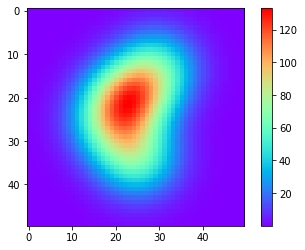

tensor(0.) tensor(11.1058)


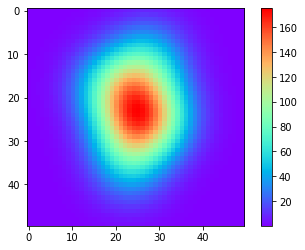

tensor(0.) tensor(11.1433)


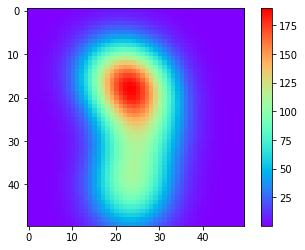

tensor(0.) tensor(8.1702)


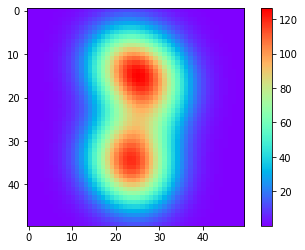

tensor(0.) tensor(10.1916)


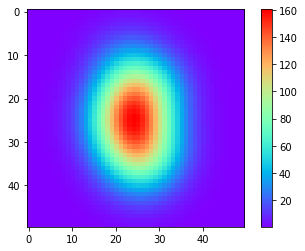

tensor(0.) tensor(7.8894)


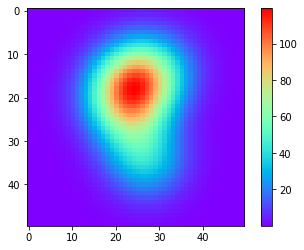

tensor(0.) tensor(5.3879)


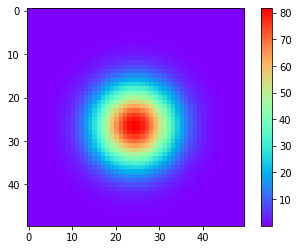

tensor(0.) tensor(6.5633)


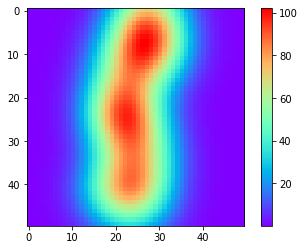

tensor(0.) tensor(6.4800)


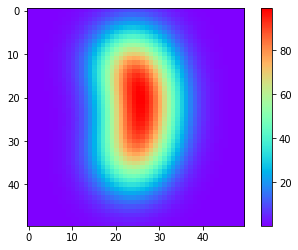

tensor(0.) tensor(7.1932)


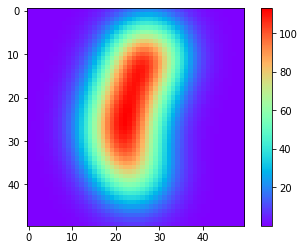

tensor(0.) tensor(12.6100)


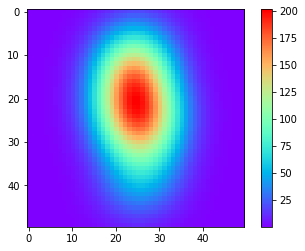

In [13]:
#visualize obtained results

dataloader_iterator = iter(training_generator_gauss)
for i in range(15):
    volume, target = next(dataloader_iterator)
    print(volume.min(),volume.max())
#     print(volume.shape)
#     except StopIteration:
#         dataloader_iterator = iter(training_generator_waves)
#         volume, target = next(dataloader_iterator)
    volnp=volume[:,elements['C'],:,:,:].squeeze().numpy()
    volnp=volnp.sum(axis=2)
    vis.molecule_visualization2D([volnp])
#     print(smile)
#     s = VolToDx()(**{'volume':volume[:,:,:,:,1].squeeze().numpy(),'origin':np.array([-17.5,-17.5,-17.5]),'dsteps':np.array([0.5,0.5,0.5])})

tensor(-9.4035) tensor(6.7295)


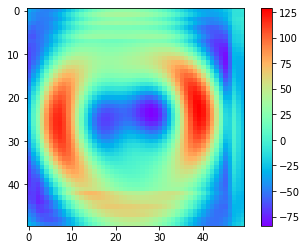

tensor(-14.9591) tensor(10.8649)


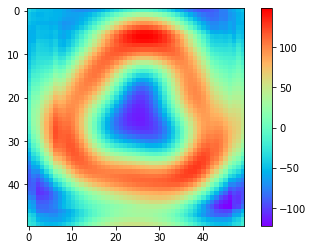

tensor(-14.2930) tensor(10.5596)


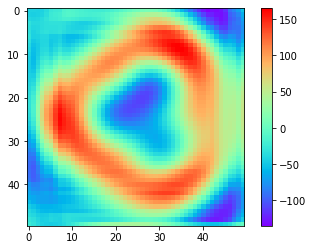

tensor(-5.8809) tensor(4.0068)


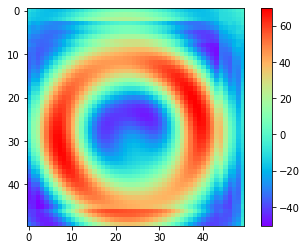

tensor(-9.7010) tensor(8.9406)


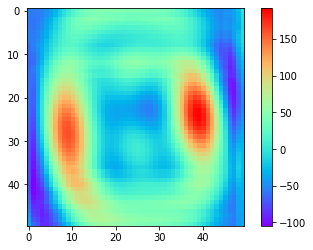

tensor(-13.5693) tensor(10.0392)


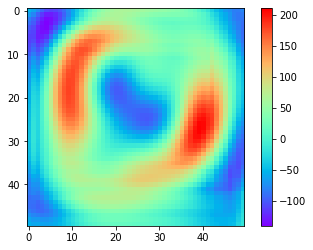

tensor(-12.4710) tensor(12.2353)


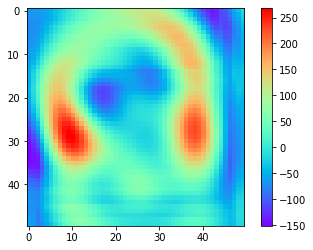

tensor(-12.2998) tensor(11.4369)


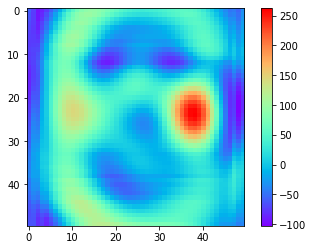

tensor(-14.5239) tensor(10.1521)


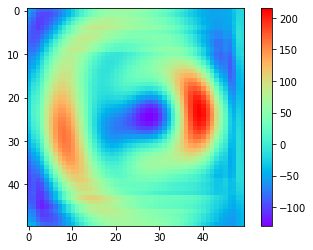

tensor(-8.2492) tensor(7.2631)


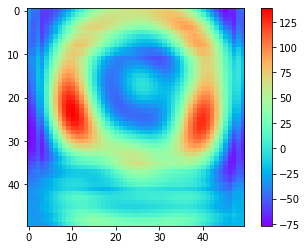

tensor(-5.2811) tensor(3.8139)


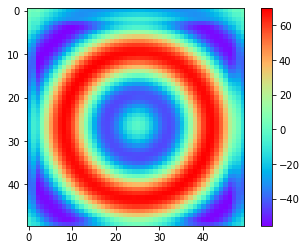

tensor(-10.5302) tensor(8.6610)


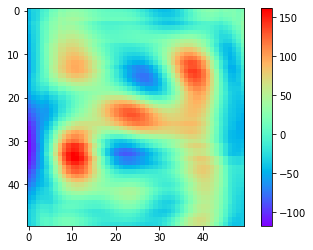

tensor(-9.5945) tensor(7.9168)


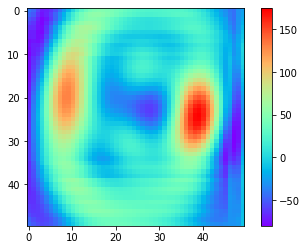

tensor(-10.0142) tensor(10.1674)


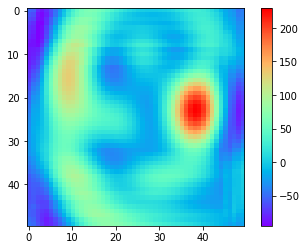

tensor(-17.7076) tensor(13.5208)


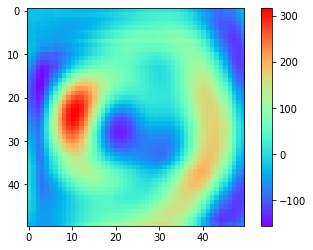

In [14]:
#visualize obtained results

dataloader_iterator = iter(training_generator_waves)
for i in range(15):
    volume, target = next(dataloader_iterator)
    print(volume.min(),volume.max())
#     print(volume.shape)
#     except StopIteration:
#         dataloader_iterator = iter(training_generator_waves)
#         volume, target = next(dataloader_iterator)
    volnp=volume[:,elements['C'],:,:,:].squeeze().numpy()
    volnp=volnp.sum(axis=2)
    vis.molecule_visualization2D([volnp])
#     print(smile)
#     s = VolToDx()(**{'volume':volume[:,:,:,:,1].squeeze().numpy(),'origin':np.array([-17.5,-17.5,-17.5]),'dsteps':np.array([0.5,0.5,0.5])})

C[n+]1c2cc(N)ccc2cc2ccc(N)cc21


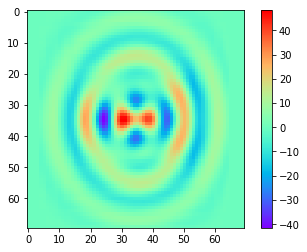

O=C([O-])c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(Br)c([O-])c(Br)cc12


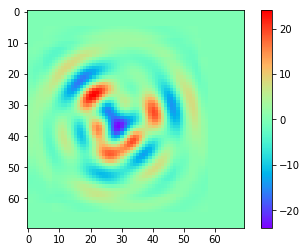

CCN(CC)C(=S)SSC(=S)N(CC)CC


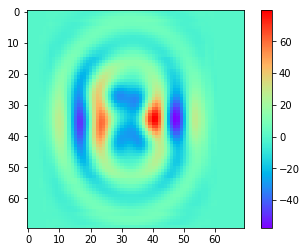

O=C(CCl)c1ccc(Cl)cc1Cl


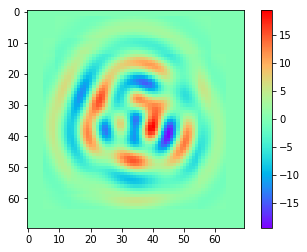

CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccccc2)cc1


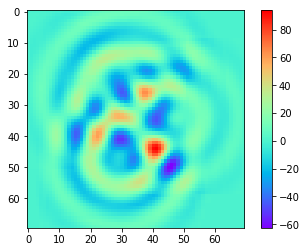

CCCCCCCCNC(C)C(O)c1ccc(SC(C)C)cc1


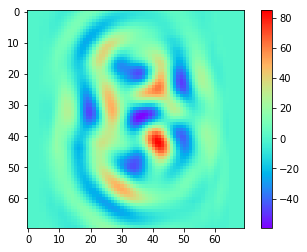

O[C@@H](CNC[C@H](O)[C@H]1CCc2cc(F)ccc2O1)[C@@H]1CCc2cc(F)ccc2O1


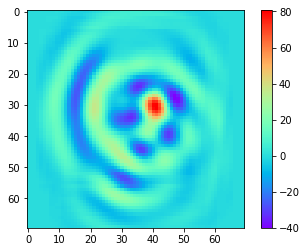

CC(C)(C)CC(C)(C)c1ccc(O)c(Cc2ccc(Cl)cc2Cl)c1


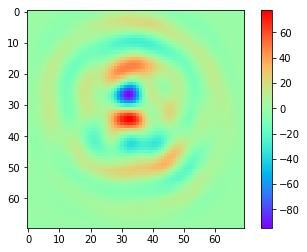

CCCCCNC(=N)N/N=C/c1c[nH]c2ccc(OC)cc12


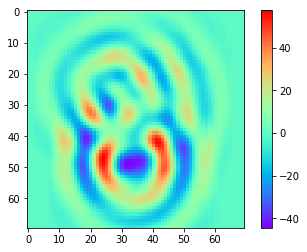

CCCCCCCCCCCCCC[N+](C)(C)C


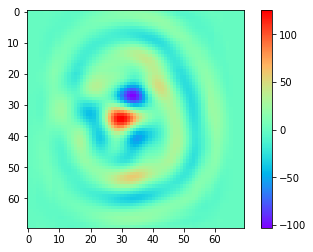

CCCCCCOc1ccc(C(=N)N(CCCC)CCCC)c2ccccc12


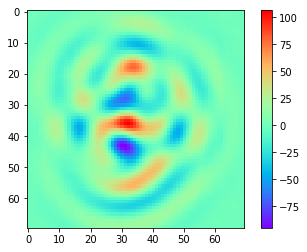

Clc1ccc(CO/N=C(\Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1


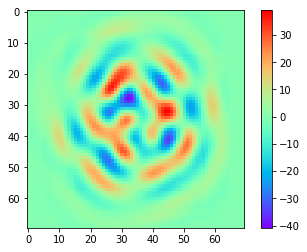

CCCCCCCCCCCCCCCC[n+]1ccccc1


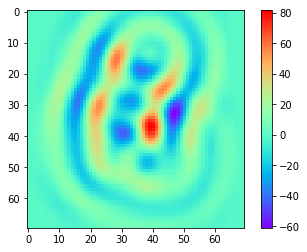

CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccc(N(C)C)cc2)cc1


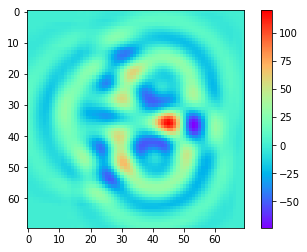

CCCCCCCCCCCC[N+](C)(C)CCOc1ccccc1


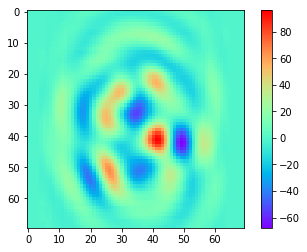

In [6]:
#visualize obtained results

dataloader_iterator = iter(training_generator_waves)
for i in range(15):
    volume, target = next(dataloader_iterator)
#     except StopIteration:
#         dataloader_iterator = iter(training_generator_waves)
#         volume, target = next(dataloader_iterator)
    volnp=volume[:,:,:,:,elements['H']].squeeze().numpy()
    volnp=volnp.sum(axis=2)
    vis.molecule_visualization2D([volnp])
#     print(smile)
#     s = VolToDx()(**{'volume':volume[:,:,:,:,1].squeeze().numpy(),'origin':np.array([-17.5,-17.5,-17.5]),'dsteps':np.array([0.5,0.5,0.5])})